# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     GridSearchCV,
                                     cross_val_score
                                     )
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay
                             )

# Preprocessing

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   str  
 3    self_employed             4269 non-null   str  
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   str  
dtypes: int64(10), str(3)
memory usage: 433.7 KB


In [7]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='str')

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='str')

In [11]:
df = df.drop("loan_id", axis=1)

In [12]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [13]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [14]:
df.dtypes

no_of_dependents            int64
education                     str
self_employed                 str
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                   str
dtype: object

In [15]:
x = df.drop("loan_status", axis=1)
y = df["loan_status"].map({
    "Approved" : 1,
    "Rejected" : 0
}).astype(int)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [18]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [19]:
x_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,5,Not Graduate,No,7900000,29900000,6,568,5800000,13900000,15900000,8700000
1164,0,Not Graduate,Yes,9600000,34000000,12,710,23800000,10300000,38100000,7800000
192,1,Graduate,No,800000,2900000,8,682,2200000,1100000,2900000,700000
910,2,Graduate,Yes,4900000,13100000,18,754,8200000,3300000,16500000,7200000
567,5,Graduate,Yes,3000000,11100000,12,441,8500000,2500000,7300000,2000000
...,...,...,...,...,...,...,...,...,...,...,...
3444,0,Graduate,Yes,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,5,Not Graduate,Yes,500000,1800000,18,411,1000000,500000,1300000,200000
3092,4,Not Graduate,Yes,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,2,Not Graduate,Yes,7000000,21400000,12,541,3700000,1300000,19800000,9600000


In [20]:
y_train

1675    1
1164    1
192     1
910     1
567     0
       ..
3444    0
466     0
3092    0
3772    0
860     1
Name: loan_status, Length: 3415, dtype: int64

In [21]:
num_col = x.select_dtypes(["int64","float64"]).columns
cat_col = x.select_dtypes("str").columns

In [22]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_col),
    ("cat", cat_pipeline, cat_col)
])

# Model Training and Feature Importance

In [23]:
models = {
    "Logistic Regression": LogisticRegression,
    "Decision Tree": DecisionTreeClassifier,
    "Random Forest": RandomForestClassifier,
    "SVM": SVC,
    "XGBoost": XGBClassifier,
}

Model :- Logistic Regression
Accuracy Score: 0.905152224824356
Precision Score: 0.9205175600739371
Recall Score: 0.9291044776119403
F1 Score : 0.924791086350975
ROC AUC Score: 0.8969421759128884


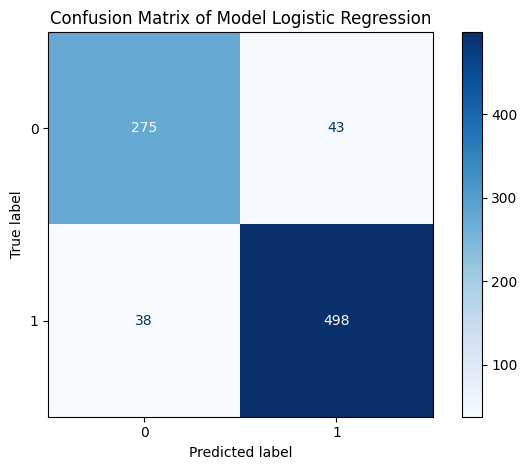

**************************************************
**************************************************
Model :- Decision Tree
Accuracy Score: 0.9765807962529274
Precision Score: 0.9813432835820896
Recall Score: 0.9813432835820896
F1 Score : 0.9813432835820896
ROC AUC Score: 0.9749483713507933


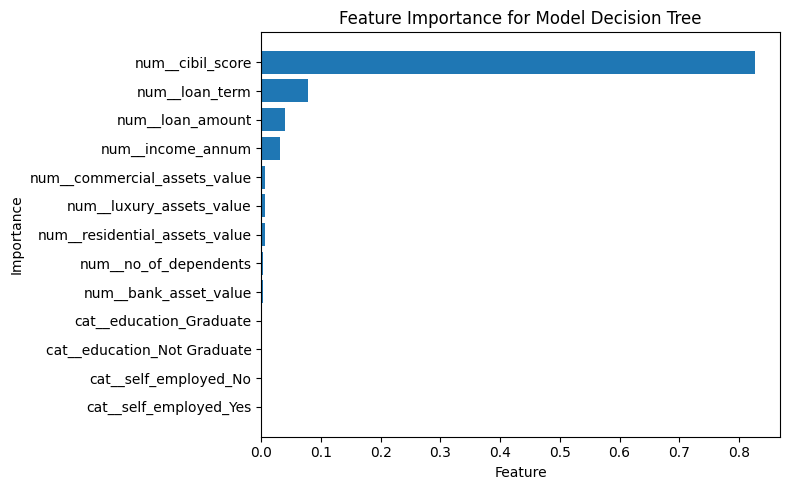

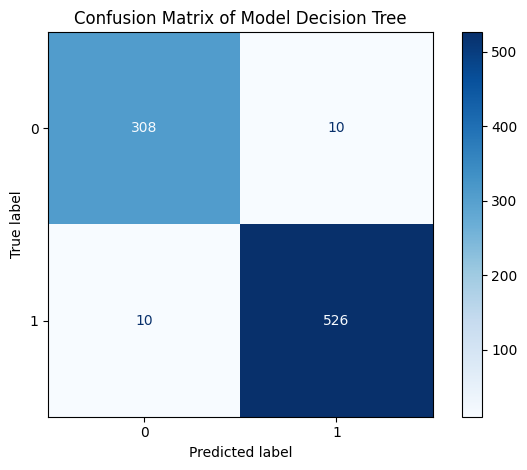

**************************************************
**************************************************
Model :- Random Forest
Accuracy Score: 0.9800936768149883
Precision Score: 0.9779005524861878
Recall Score: 0.9906716417910447
F1 Score : 0.9842446709916589
ROC AUC Score: 0.9764678963672204


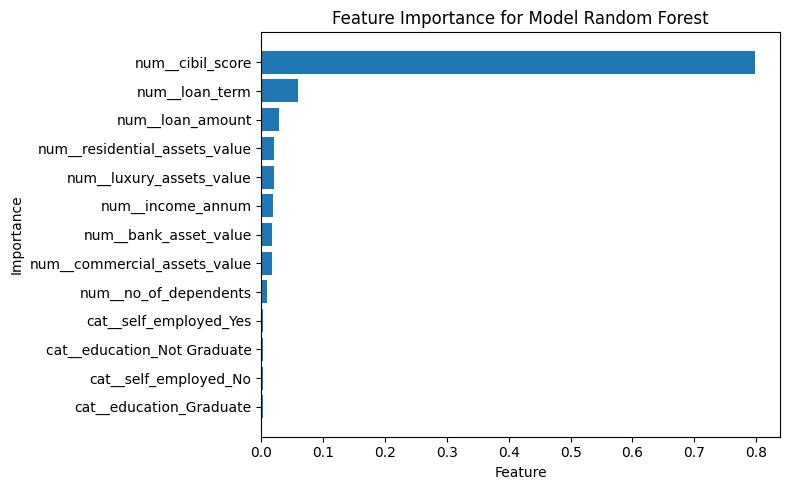

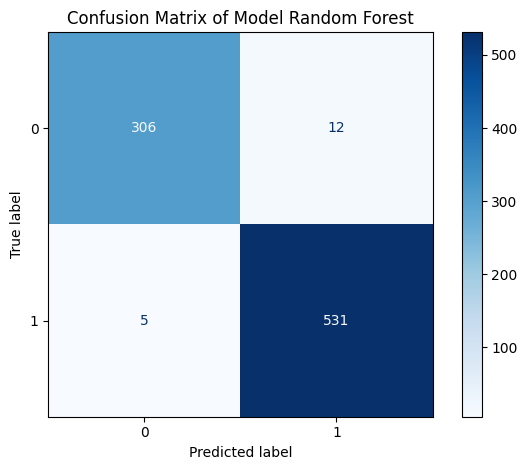

**************************************************
**************************************************
Model :- SVM
Accuracy Score: 0.9262295081967213
Precision Score: 0.9504761904761905
Recall Score: 0.9309701492537313
F1 Score : 0.94062205466541
ROC AUC Score: 0.9246045714822116


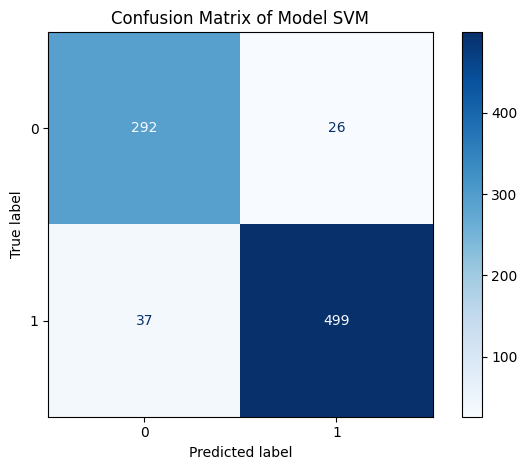

**************************************************
**************************************************
Model :- XGBoost
Accuracy Score: 0.9824355971896955
Precision Score: 0.9833024118738405
Recall Score: 0.9888059701492538
F1 Score : 0.986046511627907
ROC AUC Score: 0.9802520416784005


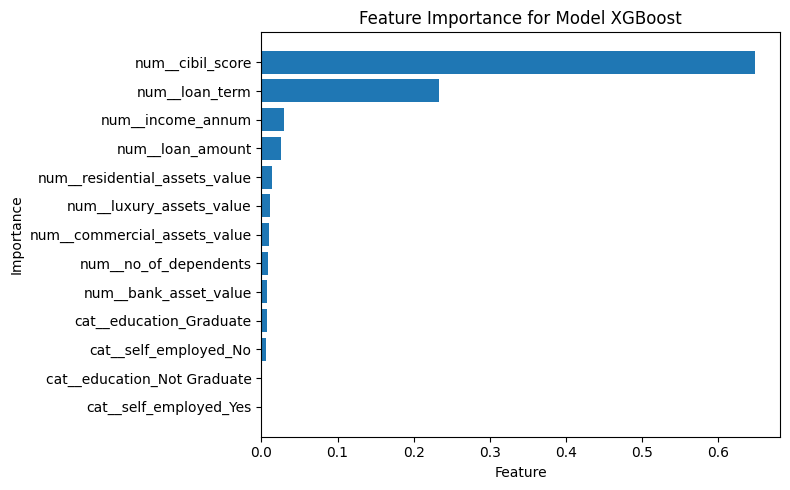

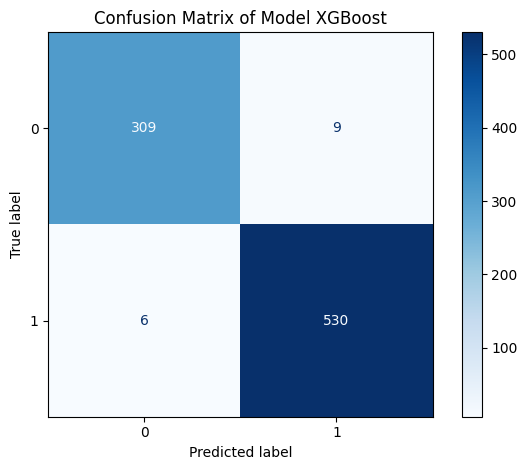

**************************************************
**************************************************


In [28]:
result = []

for name, model_name in models.items():
    model = model_name()

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model),
    ])

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Model :- {name}")
    print(f"Accuracy Score: {accuracy}")
    print(f"Precision Score: {precision}")
    print(f"Recall Score: {recall}")
    print(f"F1 Score : {f1}")
    print(f"ROC AUC Score: {roc_auc}")

    result.append({
        "Model": name,
        "Accuracy Score": accuracy,
        "Precision Score": precision,
        "Recall Score": recall,
        "F1 Score" : f1,
        "ROC AUC Score": roc_auc,
    })

    if name == "Decision Tree" or name == "Random Forest" or name == "XGBoost":
        feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()
        importance = pipeline.named_steps["model"].feature_importances_

        feature_importance_df = pd.DataFrame({
            "Feature" : feature_names,
            "Importance" : importance,
        }).sort_values(by="Importance", ascending=False)

        plt.figure(figsize=(8,5))
        plt.barh(
            feature_importance_df['Feature'],
            feature_importance_df['Importance'],
        )
        plt.gca().invert_yaxis()
        plt.title(f"Feature Importance for Model {name}")
        plt.xlabel("Feature")
        plt.ylabel("Importance")
        plt.tight_layout()
        plt.show()

    label = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix of Model {name}")
    plt.tight_layout()
    plt.show()

    print("*"*50)
    print("*"*50)

df_result = pd.DataFrame(result)

In [29]:
df_result

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.905152,0.920518,0.929104,0.924791,0.896942
1,Decision Tree,0.976581,0.981343,0.981343,0.981343,0.974948
2,Random Forest,0.980094,0.977901,0.990672,0.984245,0.976468
3,SVM,0.926230,0.950476,0.930970,0.940622,0.924605
4,XGBoost,0.982436,0.983302,0.988806,0.986047,0.980252


In [30]:
df_result.sort_values(by=["Accuracy Score", "Precision Score"], ascending=False)

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
4,XGBoost,0.982436,0.983302,0.988806,0.986047,0.980252
2,Random Forest,0.980094,0.977901,0.990672,0.984245,0.976468
1,Decision Tree,0.976581,0.981343,0.981343,0.981343,0.974948
3,SVM,0.926230,0.950476,0.930970,0.940622,0.924605
0,Logistic Regression,0.905152,0.920518,0.929104,0.924791,0.896942


* XGBoost is best here so we will do parameter tuning here to find best parameter for model training
* And looks like for xgboost feature importance all features is important nothing to drop here

# Hyperparameter Tuning

In [31]:
cv_models = {
    "KFold" : KFold(n_splits=5, shuffle=True, random_state=42),
    "Stratified KFold" : StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
}

In [32]:
model = XGBClassifier()

In [33]:
final_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model),
])

In [34]:
cv_result = []

for name, cv in cv_models.items():
    score = cross_val_score(
        estimator=final_pipeline,
        X=x_train,
        y=y_train,
        cv=cv,
        n_jobs=-1,
        scoring="accuracy",
    )
    mean_score = score.mean()
    print(f"Strategy: {name} | CV Score: {mean_score:.4f}")

    cv_result.append({
        "Strategy": name,
        "Score": mean_score,
    })

df_cv_score = pd.DataFrame(cv_result)

Strategy: KFold | CV Score: 0.9792
Strategy: Stratified KFold | CV Score: 0.9816


In [35]:
df_cv_score

,Strategy,Score
0,KFold,0.979209
1,Stratified KFold,0.981552


* Stratified Score is higher so it is usefull

# Grid Search for best parameter

In [36]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5, 7, 10],
    'model__subsample': [0.8, 1.0]
}

In [37]:
model = XGBClassifier(
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

In [38]:
gridcv = GridSearchCV(
    estimator=final_pipeline,
    param_grid=param_grid,
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
)

In [39]:
gridcv.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__learning_rate': [0.01, 0.1], 'model__max_depth': [3, 5, ...], 'model__n_estimators': [100, 200, ...], 'model__subsample': [0.8, 1.0]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages

In [40]:
gridcv.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 7,
 'model__n_estimators': 200,
 'model__subsample': 0.8}

In [41]:
best_model = gridcv.best_estimator_

In [42]:
best_model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [43]:
final_y_pred = best_model.predict(x_test)
final_accuracy = accuracy_score(y_test, final_y_pred)
final_precision = precision_score(y_test, final_y_pred)
final_recall = recall_score(y_test, final_y_pred)
final_f1 = f1_score(y_test, final_y_pred)
final_roc_auc = roc_auc_score(y_test, final_y_pred)

In [44]:
final_accuracy, final_precision, final_recall, final_f1, final_roc_auc

(0.9765807962529274,
 0.9813432835820896,
 0.9813432835820896,
 0.9813432835820896,
 0.9749483713507933)

In [45]:
print(classification_report(y_test, final_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [46]:
df_final_score = pd.DataFrame({
    "Model" : "XGBoost",
    "Accuracy Score" : final_accuracy,
    "Precision Score" : final_precision,
    "Recall Score" : final_recall,
    "F1 Score" : final_f1,
    "ROC AUC Score" : final_roc_auc,
}, index=[0])

In [47]:
df_final_score

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,ROC AUC Score
0,XGBoost,0.976581,0.981343,0.981343,0.981343,0.974948


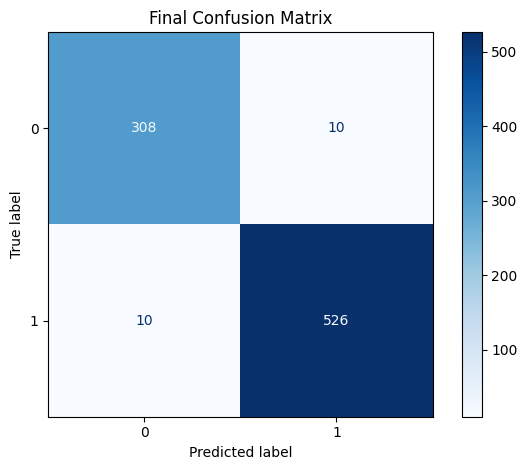

In [48]:
cm = confusion_matrix(y_test, final_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Final Confusion Matrix")
plt.tight_layout()
plt.show()